In [1]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [3]:
df = pd.read_csv('results/opt_and_forecast_revision_study_12x12_nogridscore_phase1.csv')
df = df[df['phase'] == 1]
df

,phase,steps_skip_optimization,steps_skip_forecast,tc,apc,aec,agc,agent_time_elapsed
0,1,12,12,0.495043,0.641681,0.843449,1.039058,524.739474
1,1,11,11,0.494413,0.640051,0.843187,1.032767,568.617034
2,1,10,11,0.495694,0.641539,0.845544,1.029999,628.924713
3,1,11,12,0.495919,0.641432,0.846324,1.029217,623.686886
4,1,10,10,0.494311,0.640522,0.842410,1.030906,638.161534
...,...,...,...,...,...,...,...,...
73,1,1,8,0.492619,0.637813,0.840045,1.031263,6261.032392
74,1,1,4,0.491534,0.637405,0.837197,1.034900,6262.614018
75,1,1,6,0.493214,0.639393,0.840249,1.036713,6278.062864
76,1,1,5,0.492915,0.639591,0.839155,1.035264,6293.405217


In [4]:
# make a pivot table from steps_skip_optimizaiton and steps_skip_forecast and tc as values
df_pivot = df.pivot_table(index='steps_skip_optimization', columns='steps_skip_forecast', values='tc')
df_pivot

steps_skip_forecast,1,2,3,4,5,6,7,8,9,10,11,12
steps_skip_optimization,,,,,,,,,,,,
1,0.486242,0.489366,0.491362,0.491534,0.492915,0.493214,0.493343,0.492619,0.494133,0.494121,0.493979,0.494764
2,NaN,0.489458,0.492467,0.491671,0.493518,0.493172,0.494031,0.492676,0.494711,0.494280,0.494621,0.494625
3,NaN,NaN,0.491304,0.494394,0.494135,0.493263,0.494523,0.495266,0.494193,0.495069,0.495013,0.494820
4,NaN,NaN,NaN,0.491763,0.494487,0.494813,0.494635,0.492761,0.495346,0.494960,0.495002,0.494838
5,NaN,NaN,NaN,NaN,0.492924,0.495032,0.495138,0.494921,0.495464,0.494436,0.495324,0.495294
6,NaN,NaN,NaN,NaN,NaN,0.493294,0.495214,0.495579,0.494979,0.495304,0.495374,0.494969
7,NaN,NaN,NaN,NaN,NaN,NaN,0.493470,0.495173,0.495393,0.495665,0.495420,0.495727
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493028,0.495529,0.495314,0.495172,0.495711
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494345,0.495684,0.495680,0.495497


In [5]:
# in df_pivot make all cells where column index is smaller than row index NaN
for i in range(0,12):
    for j in range(0,12):
        if j < i:
            df_pivot.iloc[i,j] = np.nan

In [6]:
df_pivot

steps_skip_forecast,1,2,3,4,5,6,7,8,9,10,11,12
steps_skip_optimization,,,,,,,,,,,,
1,0.486242,0.489366,0.491362,0.491534,0.492915,0.493214,0.493343,0.492619,0.494133,0.494121,0.493979,0.494764
2,NaN,0.489458,0.492467,0.491671,0.493518,0.493172,0.494031,0.492676,0.494711,0.494280,0.494621,0.494625
3,NaN,NaN,0.491304,0.494394,0.494135,0.493263,0.494523,0.495266,0.494193,0.495069,0.495013,0.494820
4,NaN,NaN,NaN,0.491763,0.494487,0.494813,0.494635,0.492761,0.495346,0.494960,0.495002,0.494838
5,NaN,NaN,NaN,NaN,0.492924,0.495032,0.495138,0.494921,0.495464,0.494436,0.495324,0.495294
6,NaN,NaN,NaN,NaN,NaN,0.493294,0.495214,0.495579,0.494979,0.495304,0.495374,0.494969
7,NaN,NaN,NaN,NaN,NaN,NaN,0.493470,0.495173,0.495393,0.495665,0.495420,0.495727
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493028,0.495529,0.495314,0.495172,0.495711
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494345,0.495684,0.495680,0.495497


In [17]:
# 3D plot of the pivot table with plot_surface
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
X = df_pivot.columns.values.astype(int)
Y = df_pivot.index.values.astype(int)
X, Y = np.meshgrid(X, Y)
Z = df_pivot.values
surf = ax.plot_surface(X, Y, Z,  rstride=1, cstride=1,edgecolor='none')
ax.set_xlabel('steps_skip_forecast')
ax.set_ylabel('steps_skip_optimization')

/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_10861/3802651615.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_10861/3802651615.py:10: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z,  rstride=1, cstride=1,edgecolor='none')


Text(0.5, 0, 'steps_skip_optimization')

RuntimeError: latex was not able to process the following string:
b'steps_skip_forecast'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/evgenygenov/.matplotlib/tex.cache/ac3fd9e20b10727380169a635591e673.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file ac3fd9e20b10727380169a635591e673.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily steps_
                      skip_forecast}
No pages of output.
Transcript written on ac3fd9e20b10727380169a635591e673.log.




<Figure size 6000x4800 with 1 Axes>

In [18]:
df_pivot_df = pd.DataFrame(df_pivot_diag, index=df_pivot.index)
df_pivot_df.to_csv('results/optim_score_nogridscore_phase1.csv')
df_pivot_df

,0
steps_skip_optimization,
1,0.772743
2,0.773377
3,0.774430
4,0.772825
5,0.776006
6,0.775283
7,0.775408
8,0.774415
9,0.777459


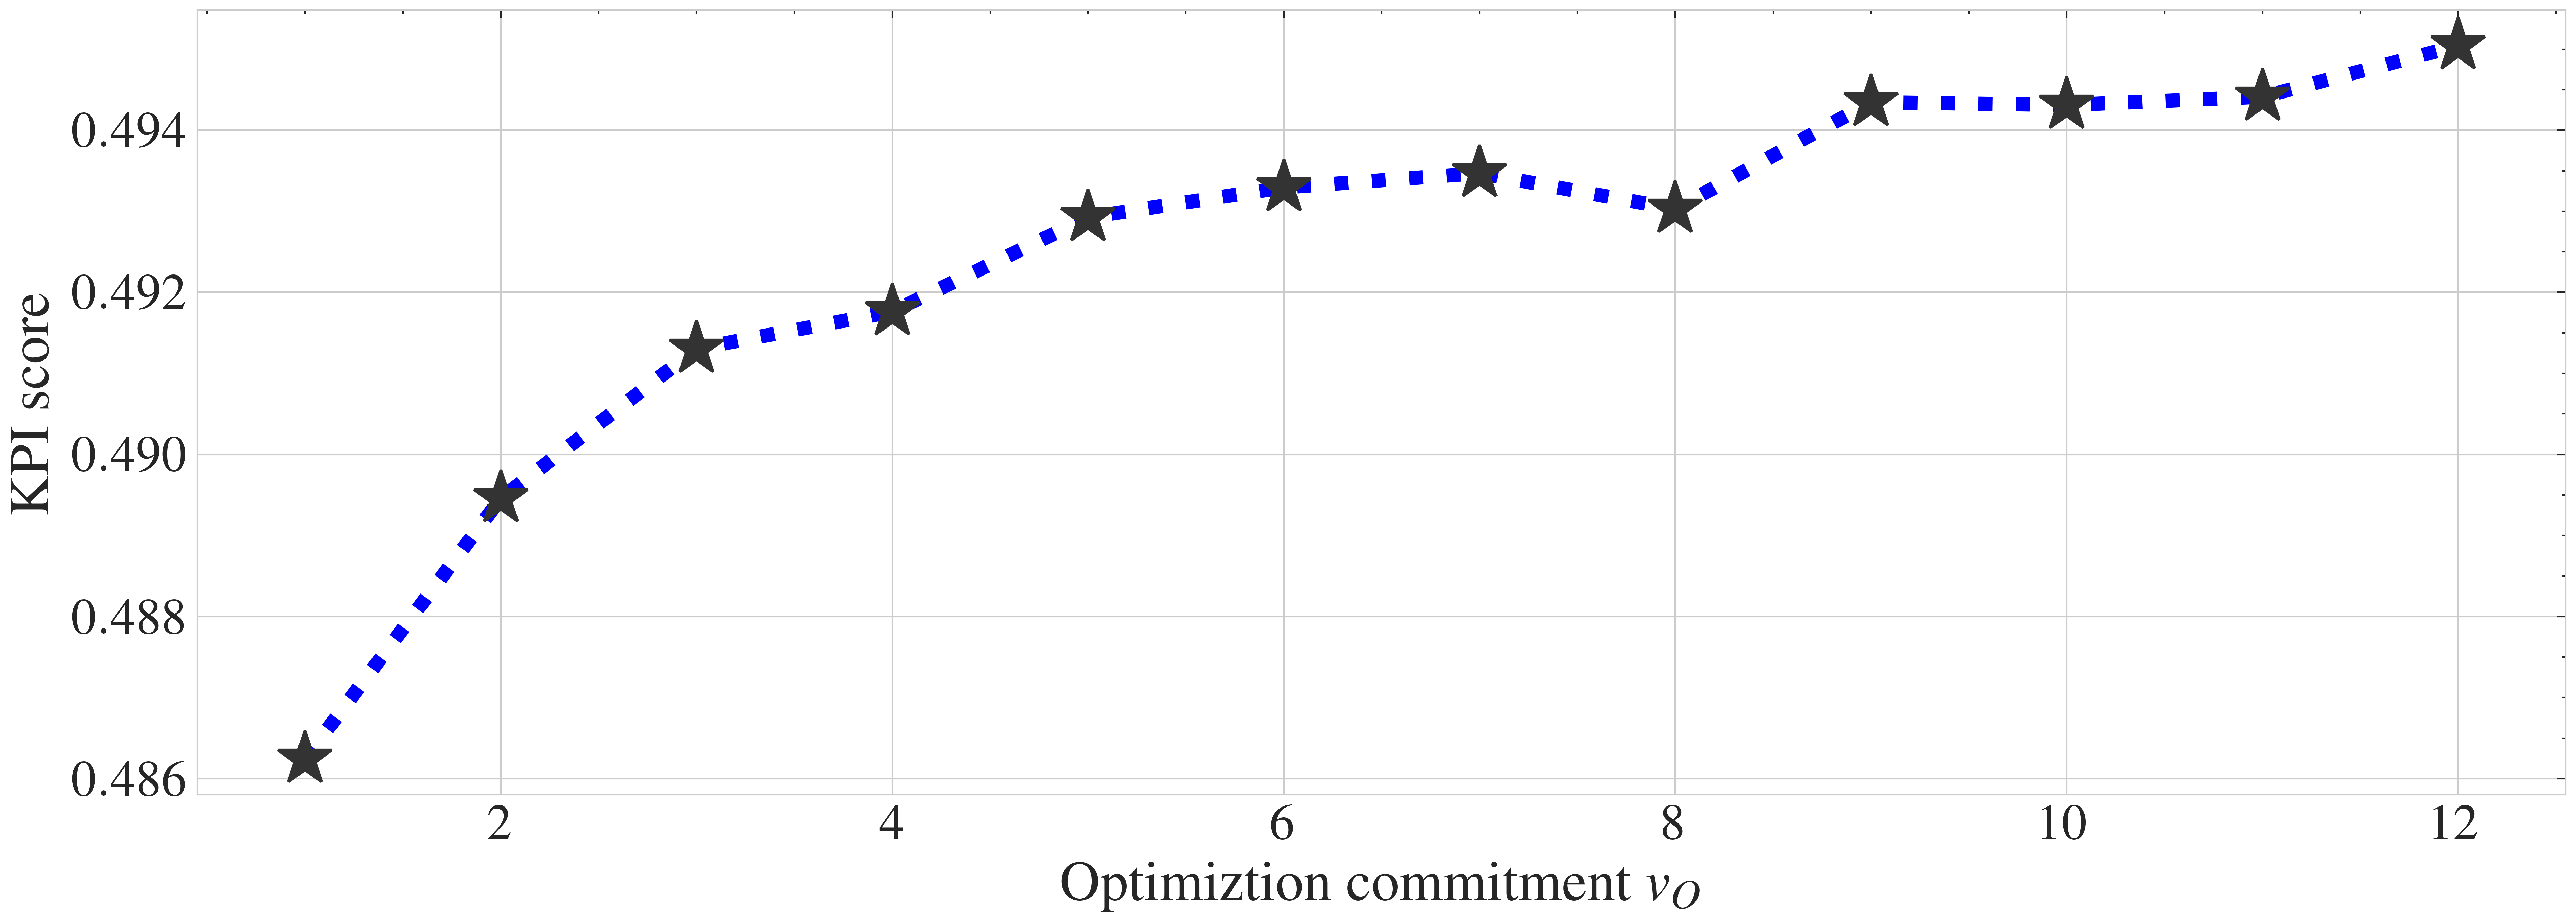

In [22]:
# take only values in the diagonal of df_pivot
plt.style.use(['science','ieee'])
df_pivot_diag = df_pivot.values.diagonal()
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_pivot.index, df_pivot_diag, marker='*', linestyle='dotted', 
        linewidth=5, markersize=20, color='blue', markeredgecolor='#333333',  markerfacecolor='#333333')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid()
plt.xlabel('Optimiztion commitment $v_{O}$', fontsize=20)
plt.ylabel('KPI score',  fontsize=20)
ax.grid()
plt.show()

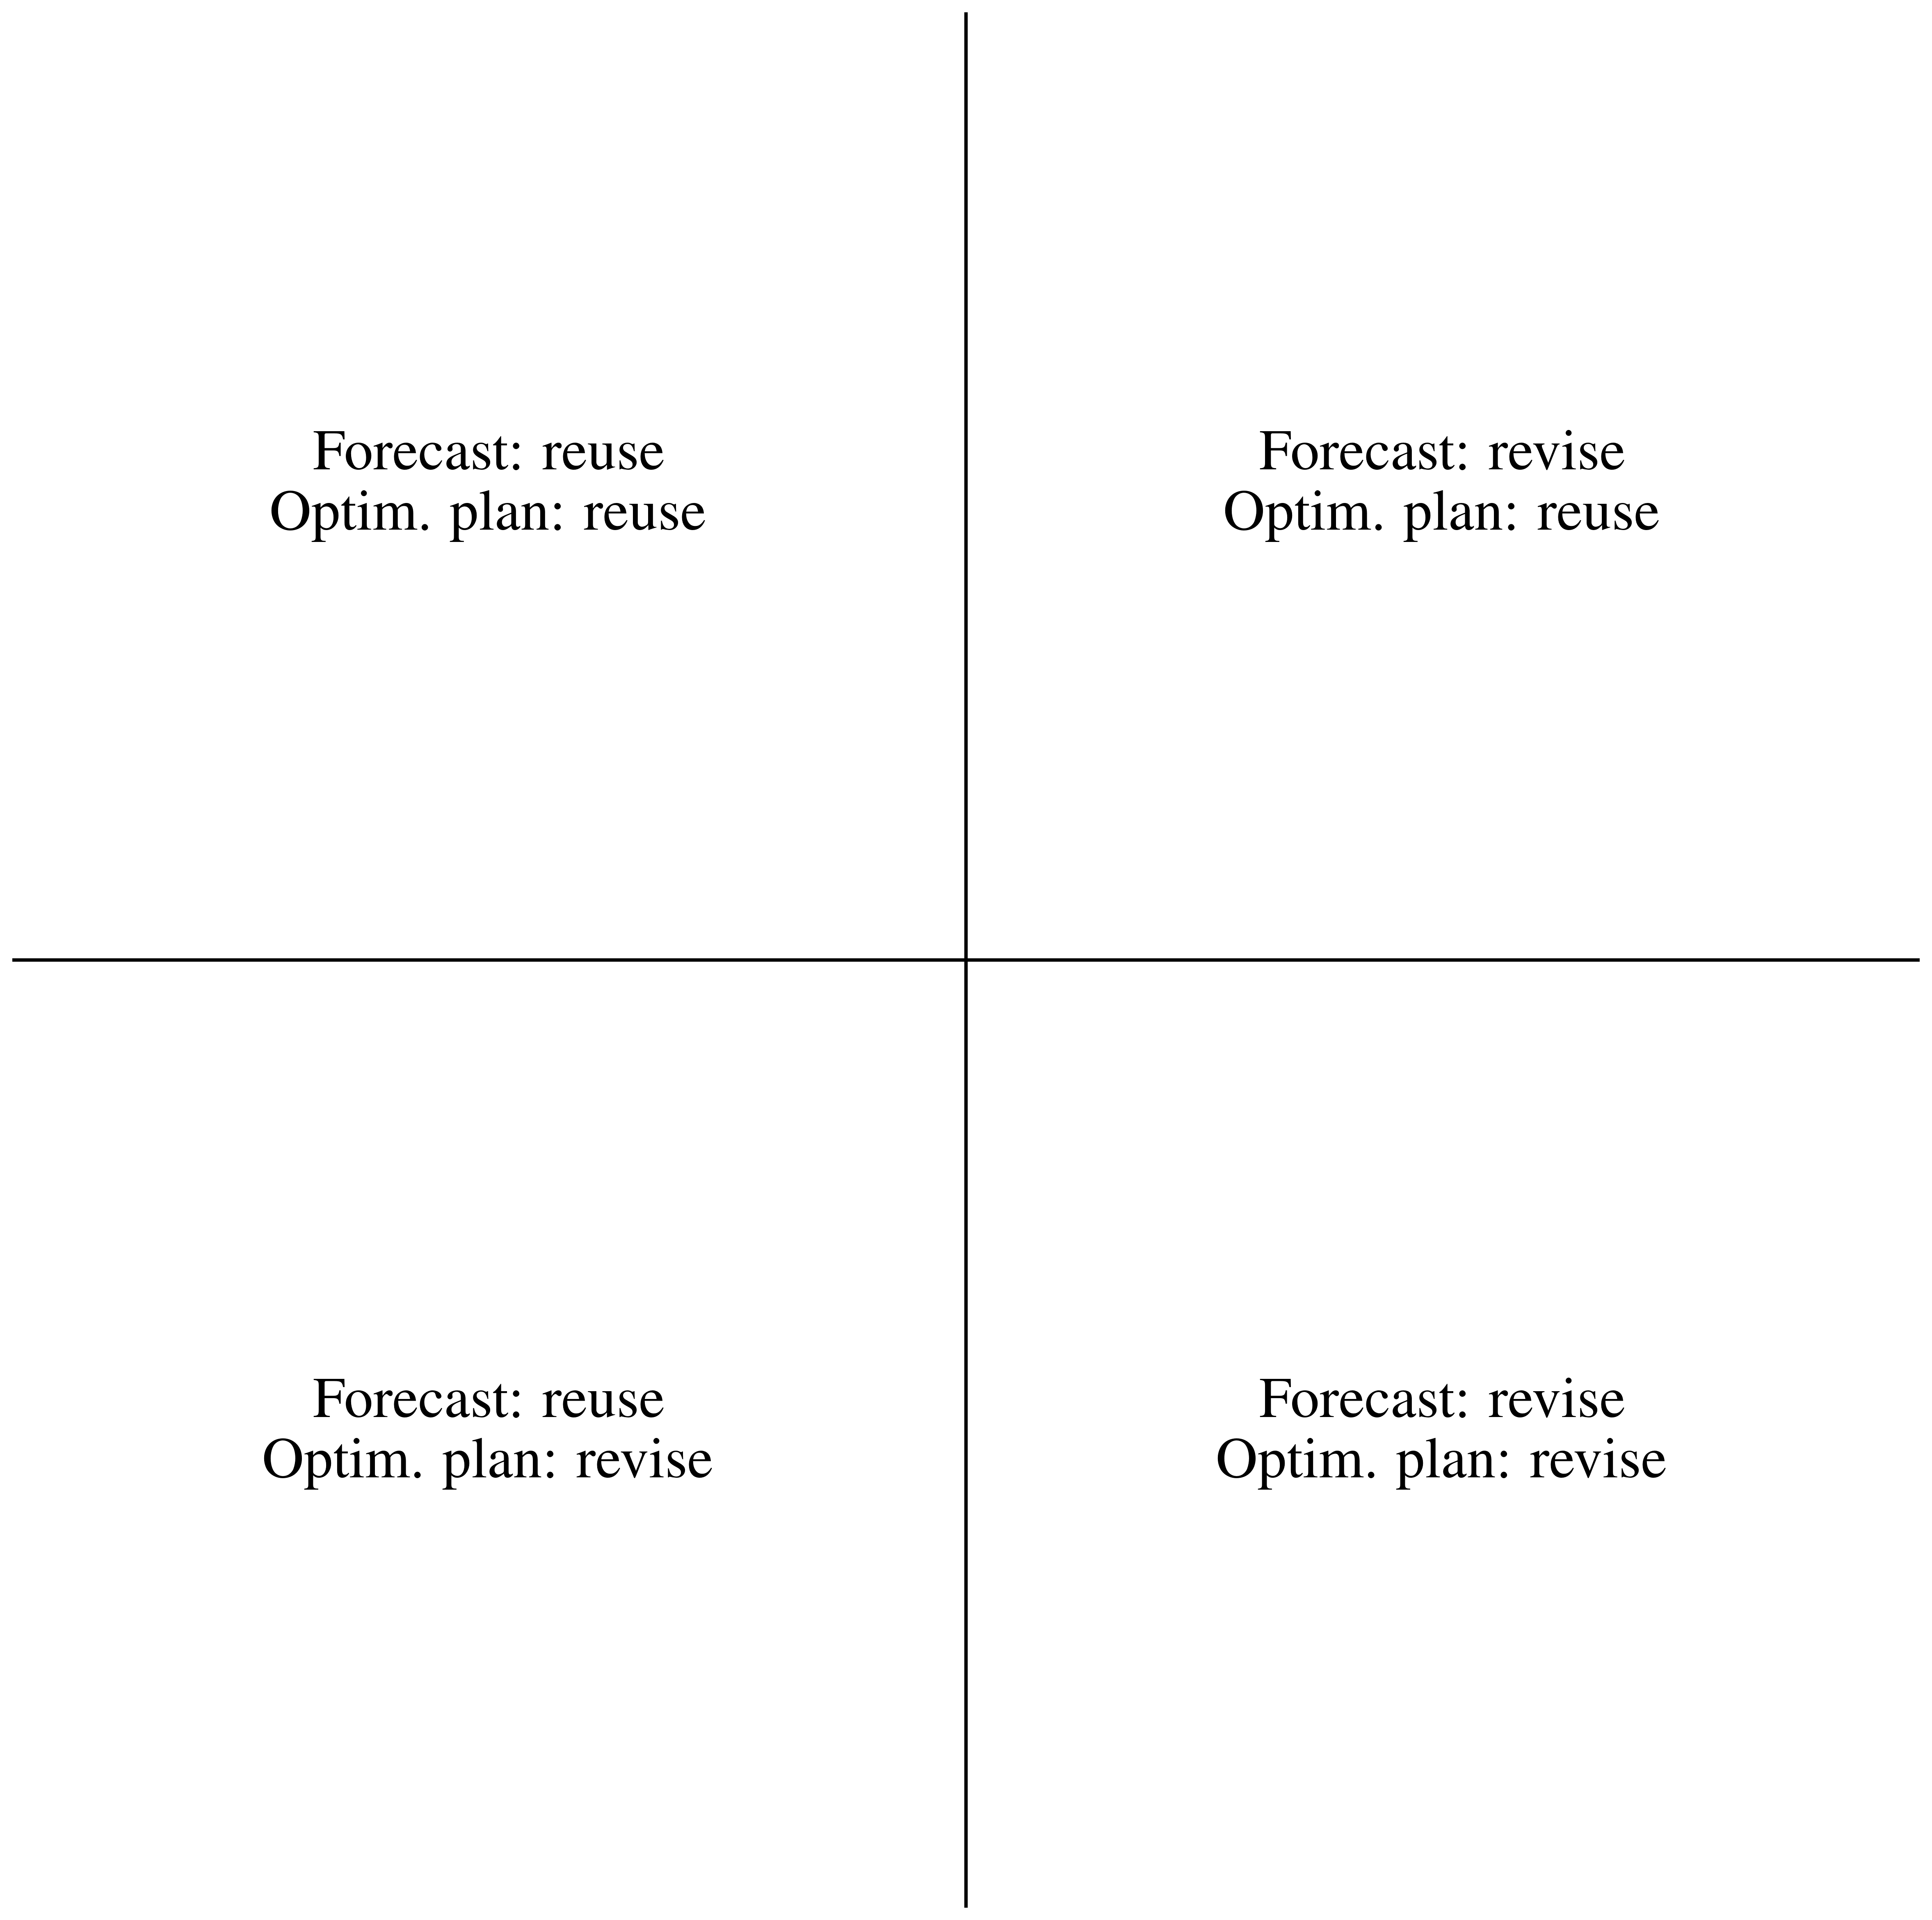

In [10]:
# Create a figure and axis with larger text
fig, ax = plt.subplots(figsize=(10, 10))

# Set axis limits
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add quadrant labels with larger font size
font_size = 17
ax.text(0.5, 1.5, "Forecast: reuse \n Optim. plan: reuse", ha='center', va='center', fontsize=font_size)
ax.text(1.5, 1.5, "Forecast: revise \n Optim. plan: reuse", ha='center', va='center', fontsize=font_size)
ax.text(0.5, 0.5, "Forecast: reuse \n Optim. plan: revise", ha='center', va='center', fontsize=font_size)
ax.text(1.5, 0.5, "Forecast: revise \n Optim. plan: revise", ha='center', va='center', fontsize=font_size)

# Draw quadrant lines
ax.axhline(y=1, color='black', linewidth=1)
ax.axvline(x=1, color='black', linewidth=1)

plt.show()


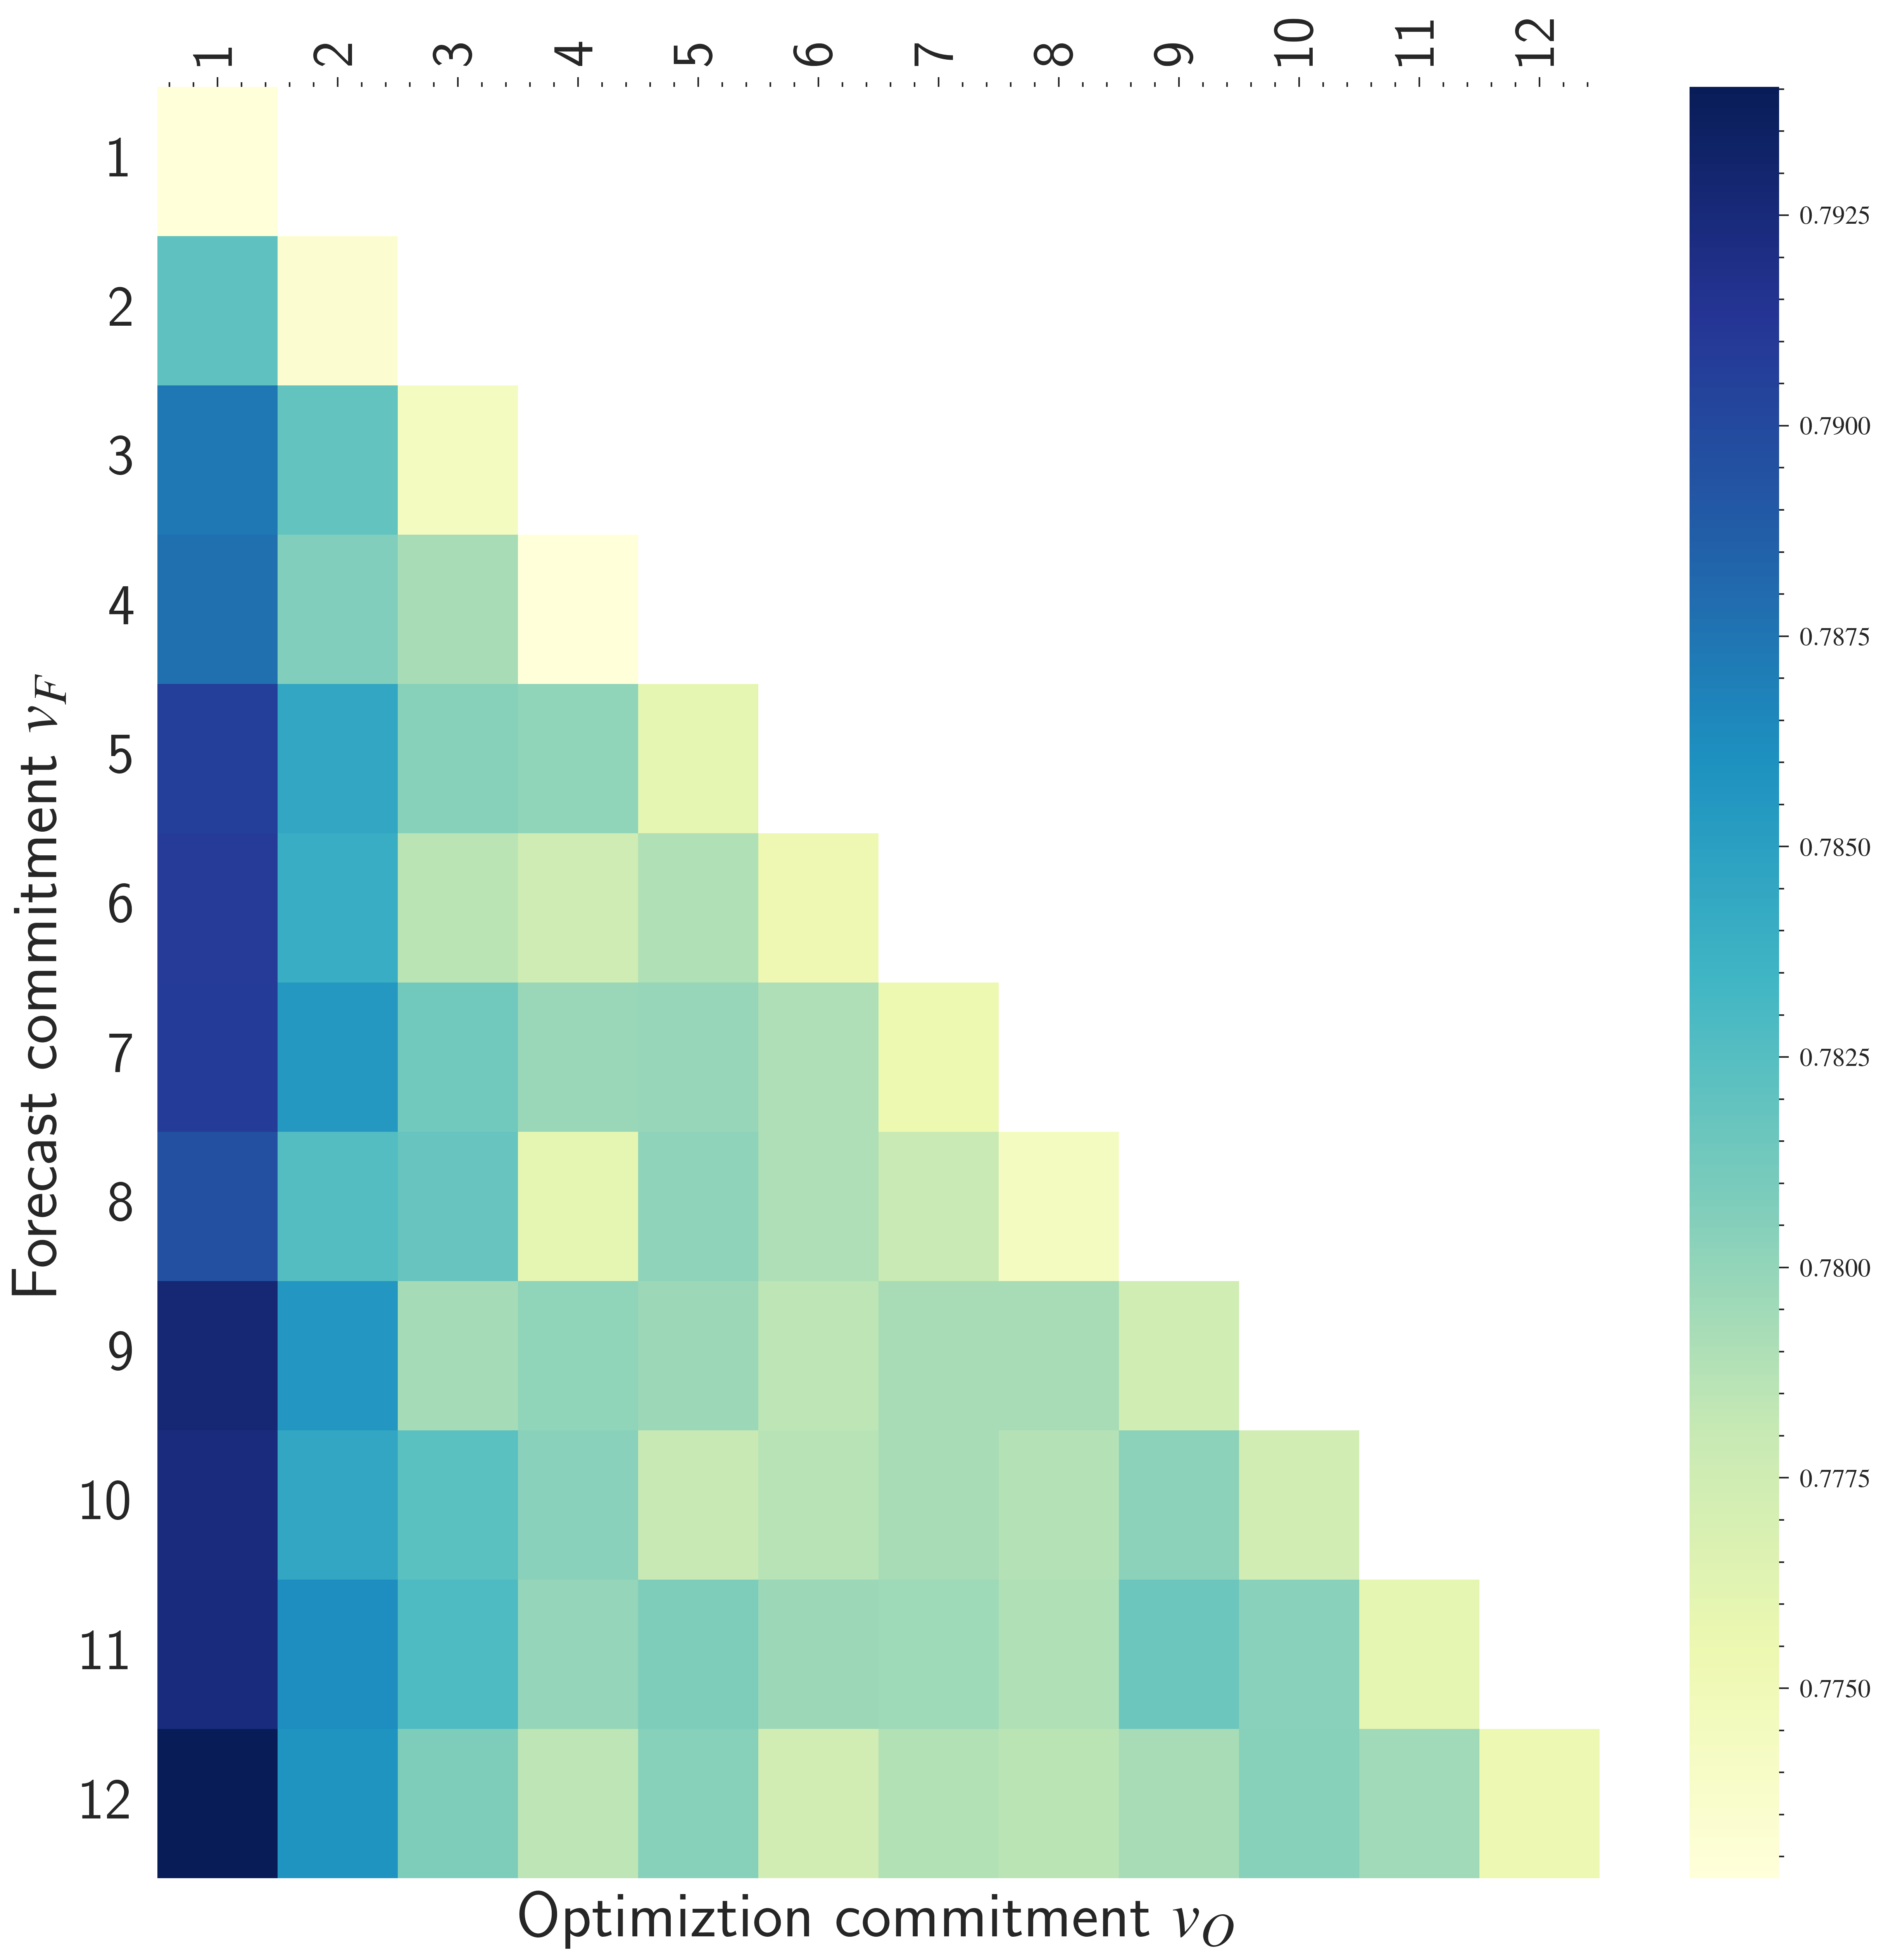

In [11]:
# draw a heatmap
# sns darkgrid
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_pivot.T, annot=False, ax=ax, fmt=".2f", cmap="YlGnBu")
ax.set_xlabel('Optimiztion commitment $v_{O}$', fontsize=20)
ax.set_ylabel('Forecast commitment $v_{F}$',  fontsize=20)
# make the heatmap looks better
#ax.invert_yaxis()
ax.xaxis.tick_top()
plt.xticks(rotation=90, ha='center', fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.show()

In [7]:
# df to latex table
print(df_pivot.T.round(3).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
steps\_skip\_optimization &     1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 &     11 &     12 \\
steps\_skip\_forecast &        &        &        &        &        &        &        &        &        &        &        &        \\
\midrule
1                   &  0.486 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
2                   &  0.489 &  0.489 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
3                   &  0.491 &  0.492 &  0.491 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
4                   &  0.492 &  0.492 &  0.494 &  0.492 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
5                   &  0.493 &  0.494 &  0.494 &  0.494 &  0.493 &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN &    NaN \\
6                   &  0.4

/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_90625/461005801.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_pivot.T.round(3).to_latex())
